In [1]:
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
milk =pd.read_csv("milk.csv",index_col=0)
milk.head()

water  protein  fat  lactose   ash
Animal                                       
HORSE       90.1      2.6  1.0      6.9  0.35
ORANGUTAN   88.5      1.4  3.5      6.0  0.24
MONKEY      88.4      2.2  2.7      6.4  0.18
DONKEY      90.3      1.7  1.4      6.2  0.40
HIPPO       90.4      0.6  4.5      4.4  0.10

In [3]:
scaler = StandardScaler()

In [4]:
milkscaled = scaler.fit_transform(milk)

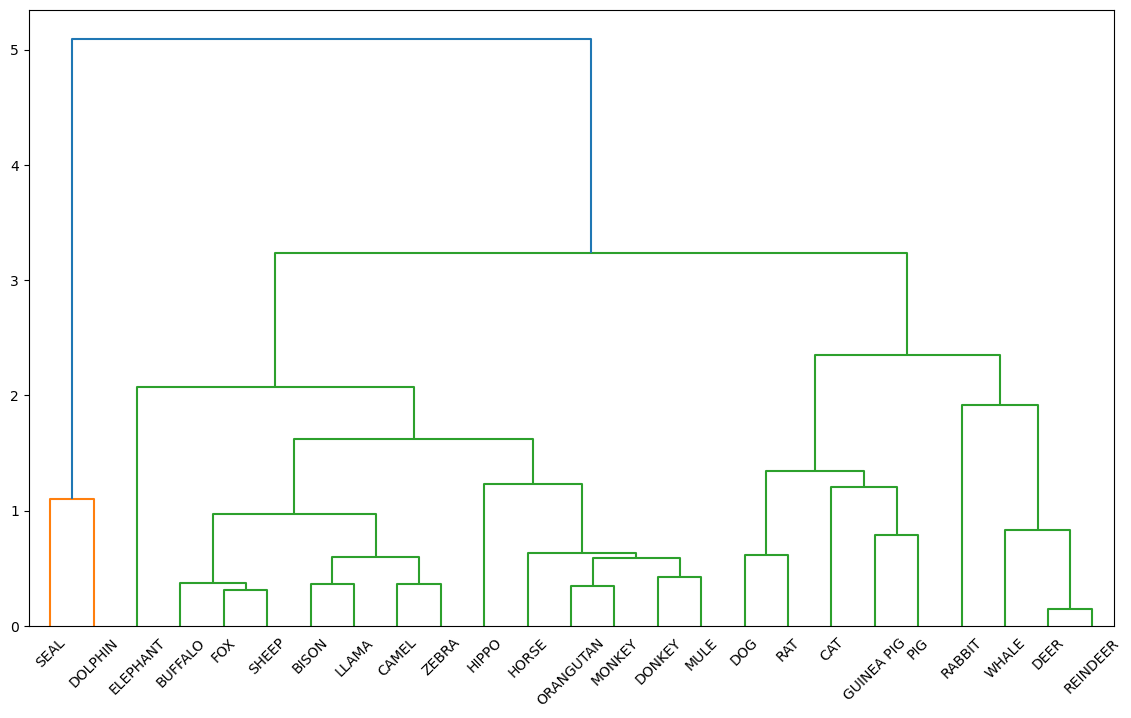

In [7]:
# calculating the linkages
merging = linkage(milkscaled,method='average')
plt.figure(figsize=(14,8))
dendrogram(merging,labels=list(milk.index),leaf_rotation=45,leaf_font_size=10)
plt.show()

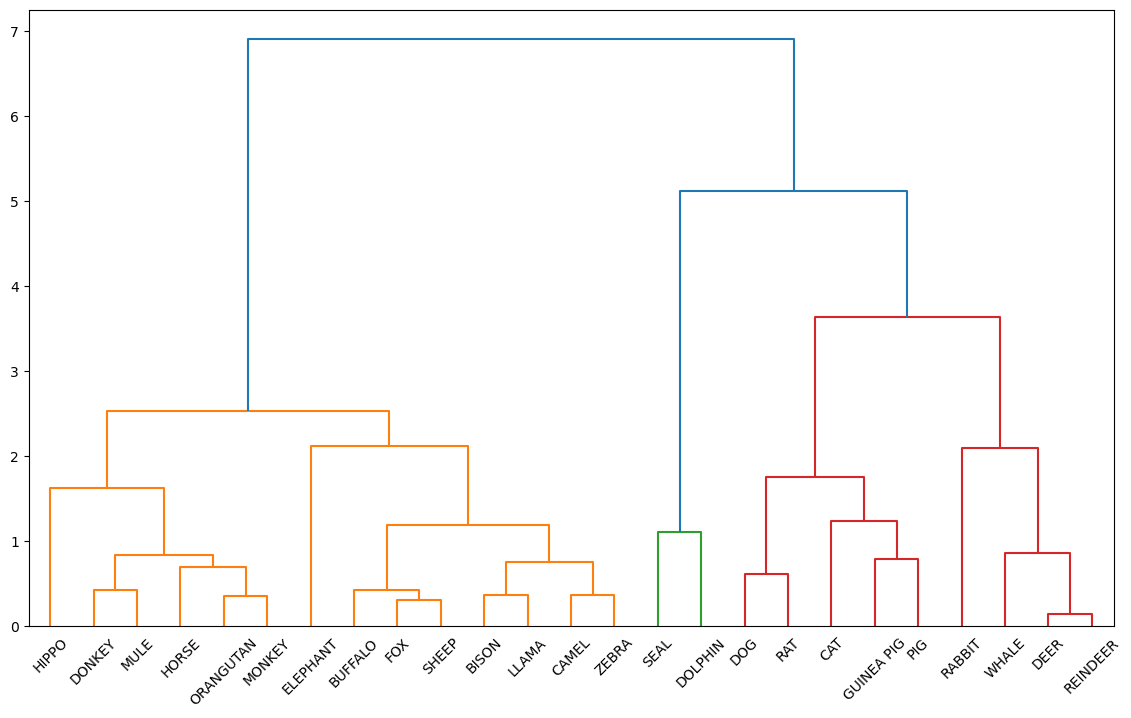

In [19]:
# calculating the linkages
merging = linkage(milkscaled,method='complete')
plt.figure(figsize=(14,8))
dendrogram(merging,labels=list(milk.index),leaf_rotation=45,leaf_font_size=10)
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

In [12]:
clustering = AgglomerativeClustering(n_clusters=2,
                                 linkage='average')
pipe = Pipeline([('SCL',scaler),('CULT',clustering)])
pipe.fit(milk)

Pipeline(steps=[('SCL', StandardScaler()),
                ('CULT', AgglomerativeClustering(linkage='average'))])

In [18]:
print("Clustering label",clustering.labels_)
print("silhoute score",silhouette_score(milkscaled,clustering.labels_))
print("silhoute score",silhouette_score(milk,clustering.labels_))

Clustering label [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
silhoute score 0.5186847578981009
silhoute score 0.6887923087147385
